# 第33课 12种聚类(无监督学习)算法说明和区分比较(一)

Python零基础学习建模：https://www.ixigua.com/home/77346806707?utm_source=xiguastudio

Python源文件及数据下载链接: https://github.com/rayc2020/LessonPythonCode


Types of clustering algorithms:

-Connectivity models: As the name suggests, these models are based on the notion that the data points closer in data space exhibit more similarity to each other than the data points lying farther away. These models can follow two approaches. In the first approach, they start with classifying all data points into separate clusters & then aggregating them as the distance decreases. In the second approach, all data points are classified as a single cluster and then partitioned as the distance increases. Also, the choice of distance function is subjective. These models are very easy to interpret but lacks scalability for handling big datasets. Examples of these models are hierarchical clustering algorithm and its variants.

-Centroid models: These are iterative clustering algorithms in which the notion of similarity is derived by the closeness of a data point to the centroid of the clusters. K-Means clustering algorithm is a popular algorithm that falls into this category. In these models, the no. of clusters required at the end have to be mentioned beforehand, which makes it important to have prior knowledge of the dataset. These models run iteratively to find the local optima.

-Distribution models: These clustering models are based on the notion of how probable is it that all data points in the cluster belong to the same distribution (For example: Normal, Gaussian). These models often suffer from overfitting. A popular example of these models is Expectation-maximization algorithm which uses multivariate normal distributions.

-Density Models: These models search the data space for areas of varied density of data points in the data space. It isolates various different density regions and assign the data points within these regions in the same cluster. Popular examples of density models are DBSCAN and OPTICS.

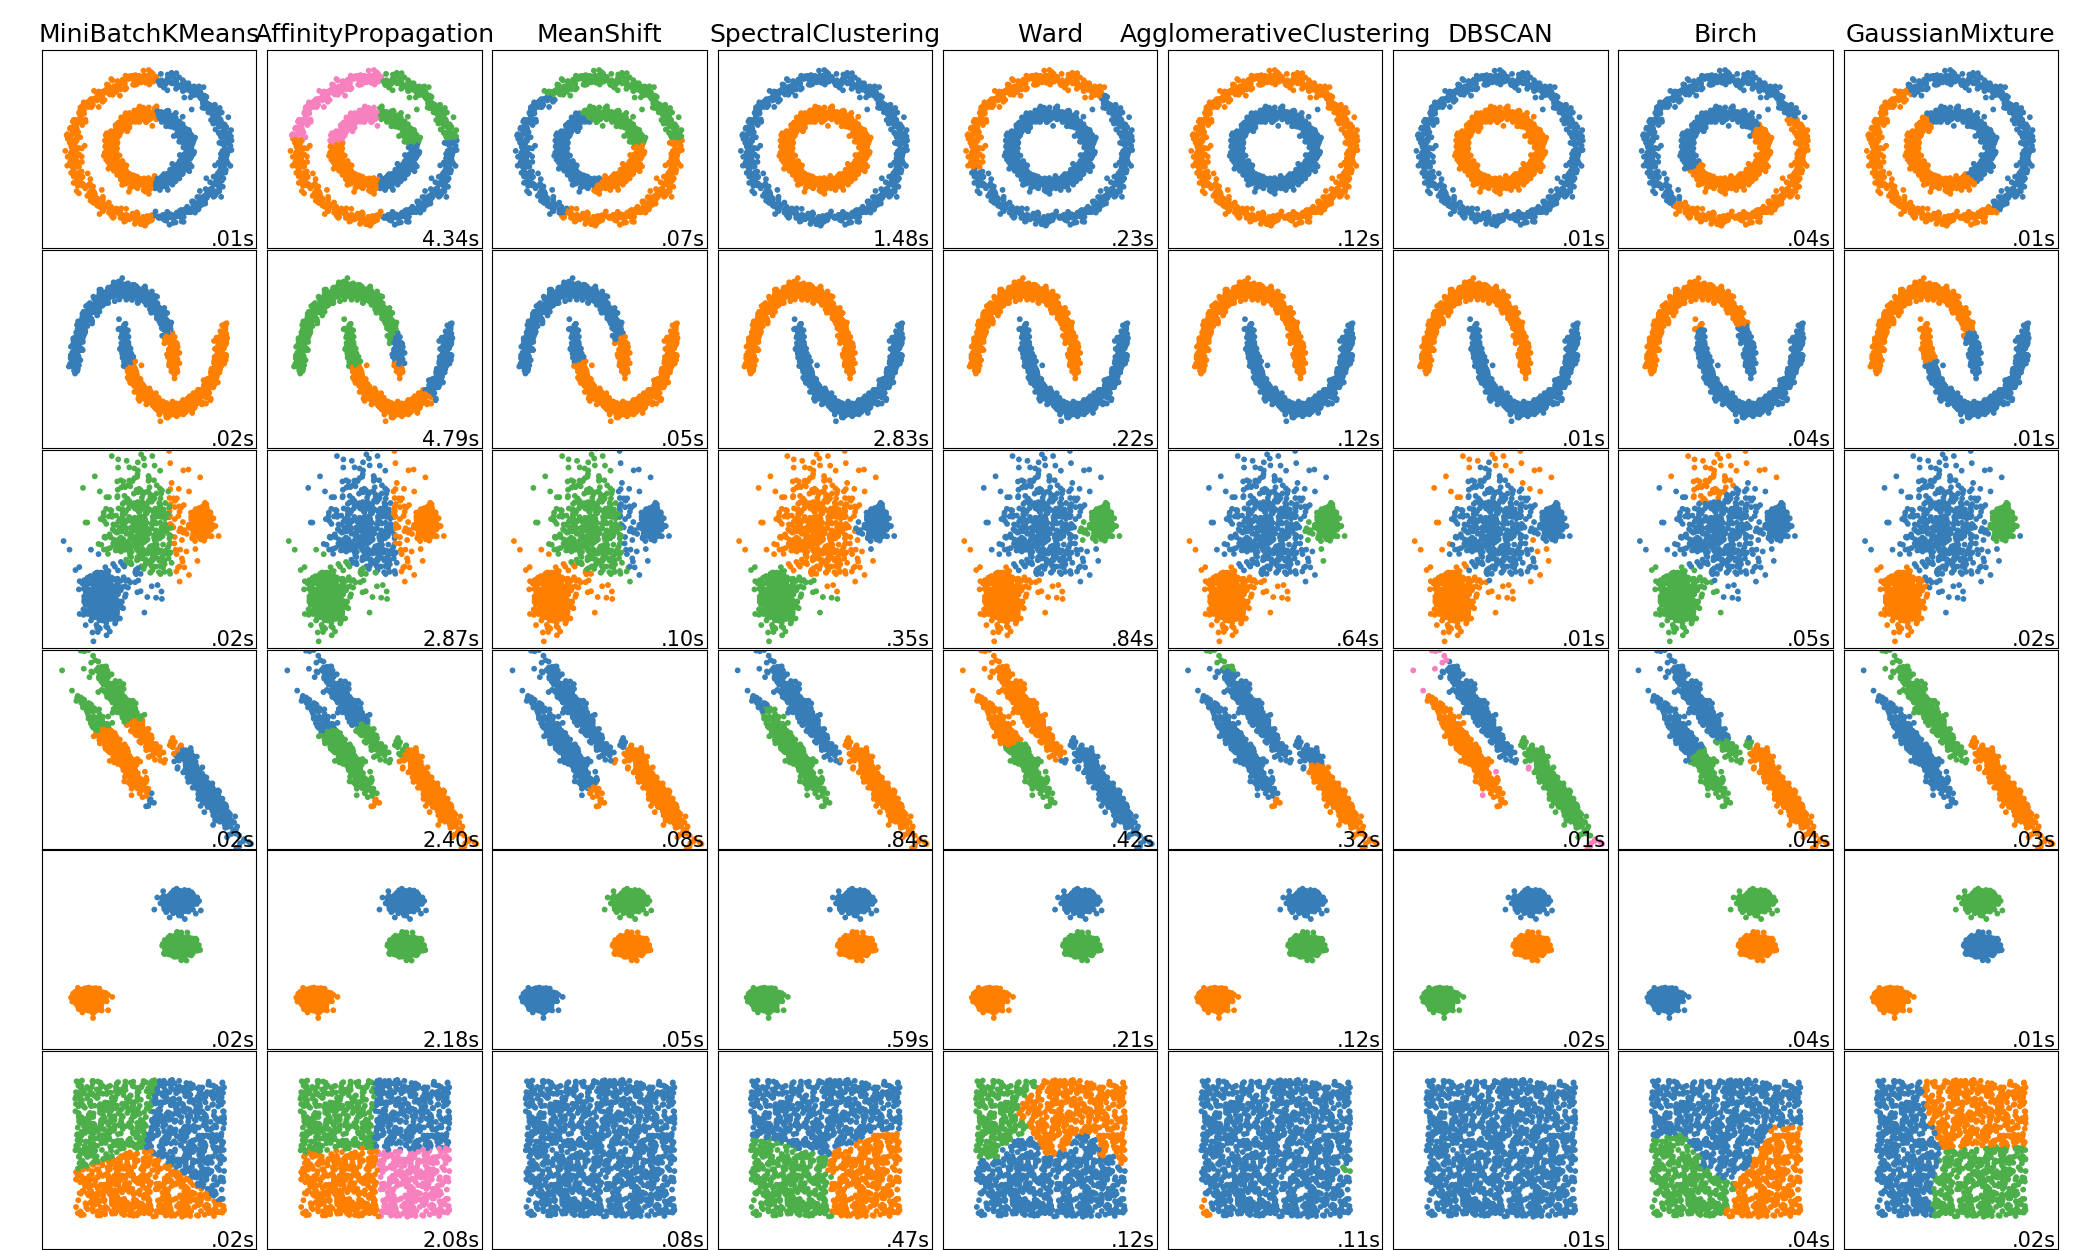

In [26]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson33-cluster.png')

In [ ]:
(1)K-Means
(2)Mini-Batch K-Means
(3)Affinity Propagation
(4)Mean Shift
Spectral Clustering
Ward
Agglomerative Clustering
DBSCAN
BIRCH
OPTICS
Mixture of Gaussians
HDBSCAN

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline

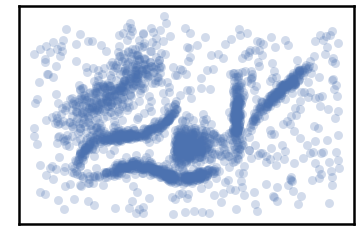

In [30]:
data = np.load('Lesson33-clusterable_data.npy')
plt.scatter(data.T[0], data.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [31]:
data

array([[-0.12153499, -0.22876337],
       [-0.22093687, -0.25251088],
       [ 0.1259037 , -0.27314321],
       ...,
       [ 0.50243143, -0.3002958 ],
       [ 0.53822256,  0.19412199],
       [-0.08688887, -0.2092721 ]])

In [35]:
data[:,1]

array([-0.22876337, -0.25251088, -0.27314321, ..., -0.3002958 ,
        0.19412199, -0.2092721 ])

In [34]:
data.T[1]

array([-0.22876337, -0.25251088, -0.27314321, ..., -0.3002958 ,
        0.19412199, -0.2092721 ])

## (1)K-Means --Centroid models

参见Lesson27详细介绍

Text(0.5, 1.0, 'Clusters found by K-Means')

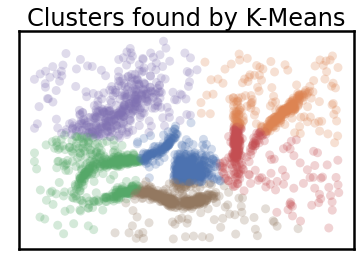

In [36]:
# k-means clustering
from numpy import unique
from sklearn.cluster import KMeans
from matplotlib import pyplot

# define the model
model = KMeans(n_clusters=6)
# fit the model
model.fit(data)
# assign a cluster to each example
yhat = model.predict(data)
# retrieve unique clusters
clusters = unique(yhat)

palette = sns.color_palette('deep', np.unique(yhat).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in yhat]
plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
plt.title('Clusters found by K-Means')

In [37]:
clusters

array([0, 1, 2, 3, 4, 5])

## (2)Mini-Batch K-Means -- Centroid models

Mini-Batch K-Means is a modified version of k-means that makes updates to the cluster centroids using mini-batches of samples rather than the entire dataset, which can make it faster for large datasets, and perhaps more robust to statistical noise.

Text(0.5, 1.0, 'Clusters found by Mini-Batch K-Means')

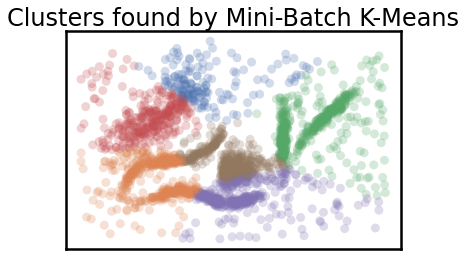

In [38]:
# mini-batch k-means clustering
from numpy import unique
from sklearn.cluster import MiniBatchKMeans
from matplotlib import pyplot

model = MiniBatchKMeans(n_clusters=6)
# fit the model
model.fit(data)
# assign a cluster to each example
yhat = model.predict(data)
# retrieve unique clusters
clusters = unique(yhat)

palette = sns.color_palette('deep', np.unique(yhat).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in yhat]
plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
plt.title('Clusters found by Mini-Batch K-Means')

In [39]:
clusters

array([0, 1, 2, 3, 4, 5])

## (3)AffinityPropagation (Hierarchical) -- Connectivity models

Based on the concept of "message passing" between data points. Unlike clustering algorithms such as k-means or k-medoids, affinity propagation does not require the number of clusters to be determined or estimated before running the algorithm. Similar to k-medoids, affinity propagation finds "exemplars," members of the input set that are representative of clusters

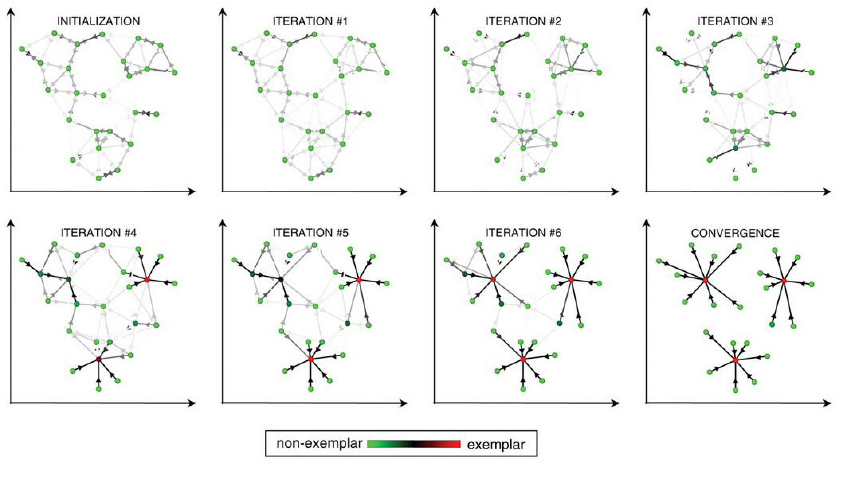

In [15]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson33-Illustration-of-how-affinity-propagation-works.png')

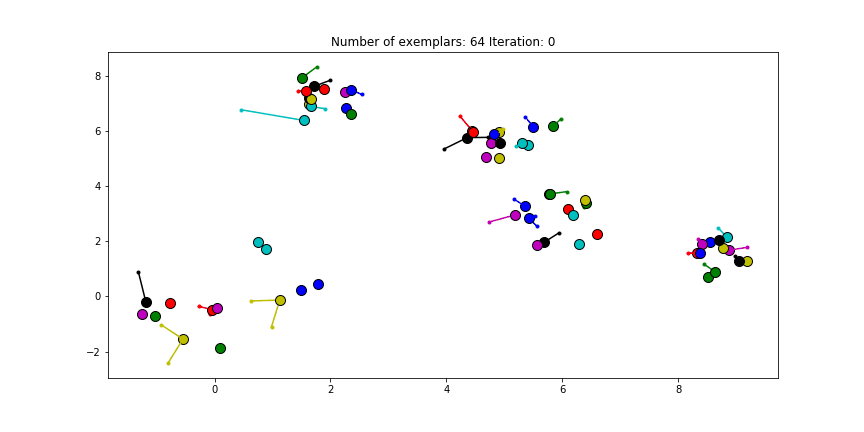

In [16]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson33-preference_median.gif')

Text(0.5, 1.0, 'Clusters found by AffinityPropagation')

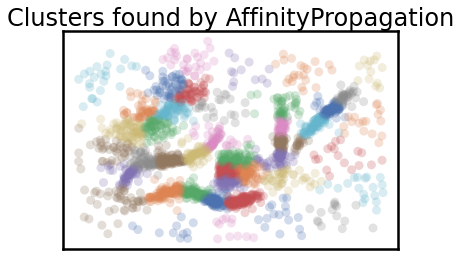

In [40]:
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot
from numpy import unique

# fit the model
model = AffinityPropagation(damping=0.95)
model.fit(data)
yhat = model.predict(data)

# retrieve unique clusters
clusters = unique(yhat)

palette = sns.color_palette('deep', np.unique(yhat).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in yhat]
plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
plt.title('Clusters found by AffinityPropagation')

In [41]:
clusters

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41], dtype=int64)

## (4)Mean Shift -- Centroid models

The mean shift algorithm is a nonparametric clustering technique which does not require prior
knowledge of the number of clusters, and does not constrain the shape of the clusters.

Mean shift builds upon the concept of kernel density estimation (KDE)

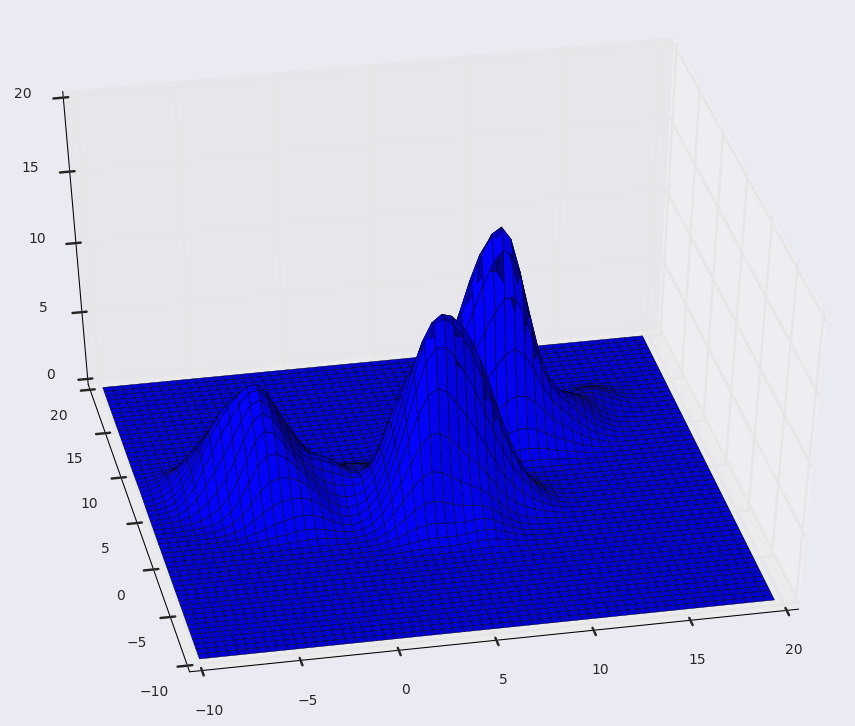

In [22]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson33-example_kde_2.png')

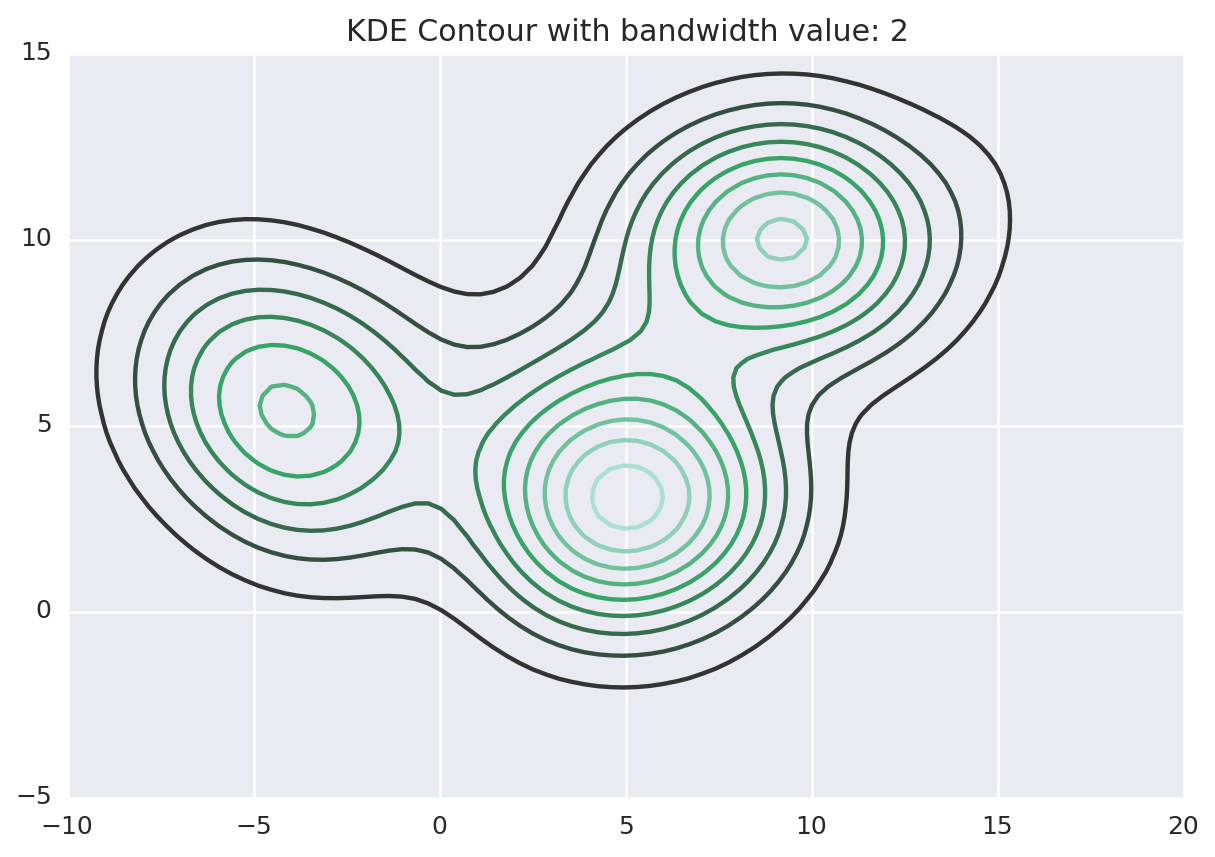

In [23]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson33-example_contour_bw_2.png')

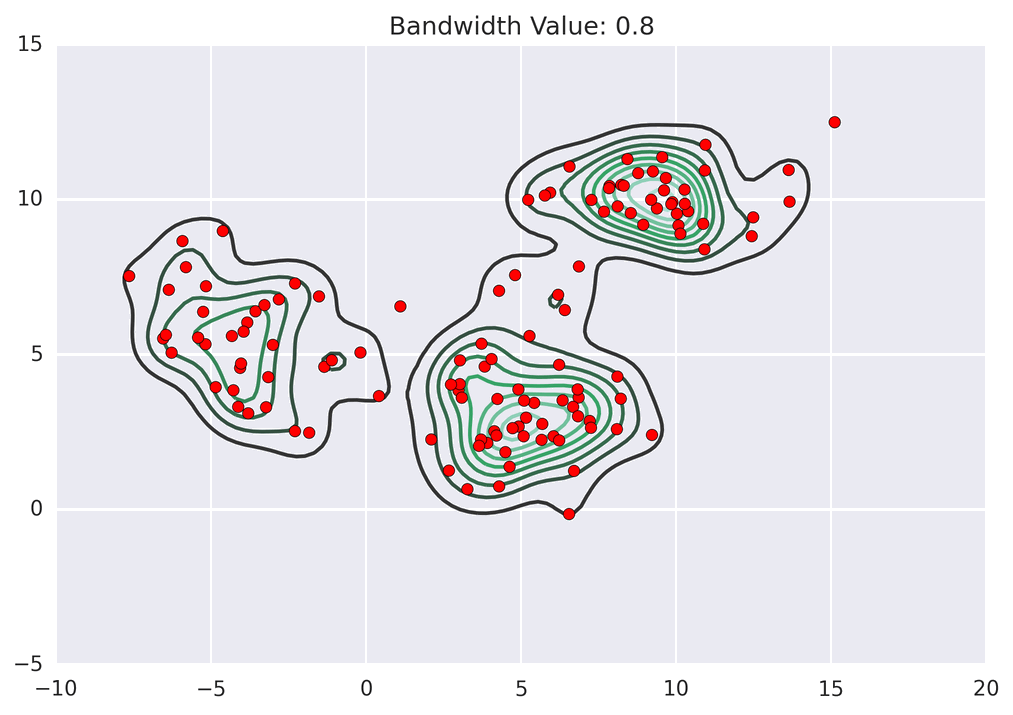

In [20]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson33-Meanshift.gif')

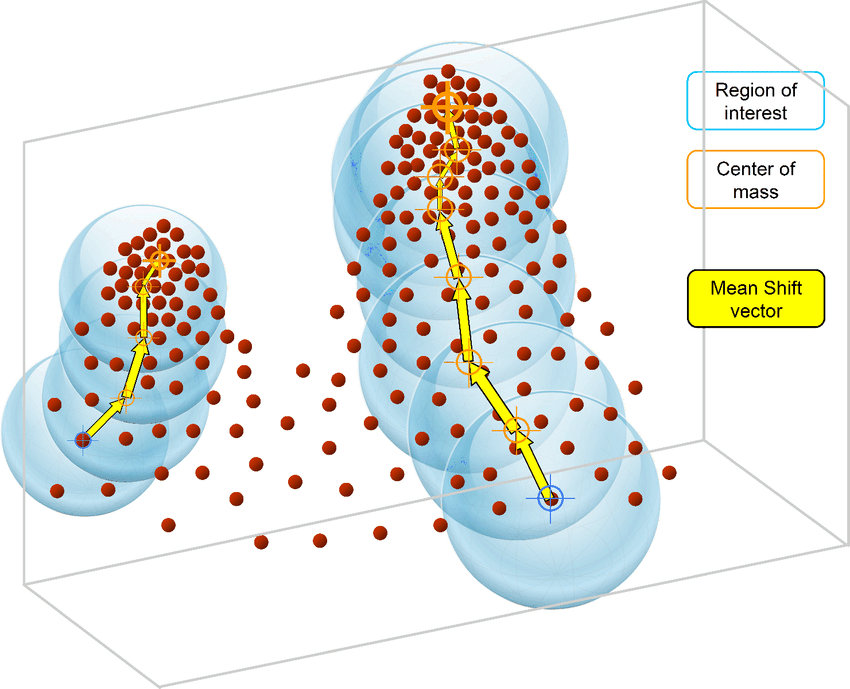

In [21]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson33-mean-shift-finding-densest-regions.png')

Text(0.5, 1.0, 'Clusters found by Mean Shift')

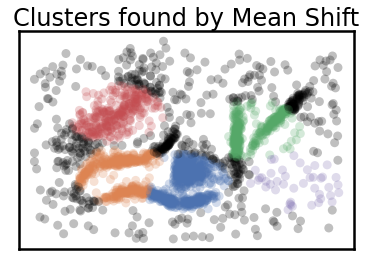

In [42]:
# mean shift clustering
from numpy import unique
from sklearn.cluster import MeanShift
from matplotlib import pyplot

# define the model
model = MeanShift(0.175,cluster_all=False)
# fit model and predict clusters
yhat = model.fit_predict(data)
# retrieve unique clusters
clusters = unique(yhat)

palette = sns.color_palette('deep', np.unique(yhat).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in yhat]
plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
plt.title('Clusters found by Mean Shift')

In [43]:
clusters

array([-1,  0,  1,  2,  3,  4])